In [64]:
class ServerWorkload:
    def __init__(self, os, license_type, server_count, cores_per_server, ram_gb, optimize_by, gpu, auto_scaling, iops, network_gb, backup_dedupe_ratio,latency,workload_type):
        self.os = os
        self.license_type = license_type
        self.server_count = server_count
        self.cores_per_server = cores_per_server
        self.ram_gb = ram_gb
        self.optimize_by = optimize_by
        self.gpu = gpu
        self.auto_scaling = auto_scaling
        self.iops = iops
        self.network_gb = network_gb
        self.backup_dedupe_ratio = backup_dedupe_ratio
        self.latency=latency;
        self.workload_type=workload_type

In [65]:
class StorageCosts:
    def __init__(self, total_storage_gb, annual_support_percent):
        self.total_storage_gb = total_storage_gb
        self.annual_support_percent = annual_support_percent

class LaborCosts:
    def __init__(self, servers_per_admin, hourly_rate):
        self.servers_per_admin = servers_per_admin
        self.hourly_rate = hourly_rate

In [66]:
def collect_server_workload():
    os = input("Operating system (Windows/Linux): ")
    license_type = input("Operating System License (Standard/Datacenter): ")
    server_count = int(input("Number of servers: "))
    cores_per_server = int(input("Cores per server: "))
    ram_gb = int(input("RAM (GB): "))
    optimize_by = input("Optimize by (CPU/GPU): ")
    gpu = input("GPU Type (None/M60/etc.): ")
    auto_scaling = input("Auto scaling (Yes/No): ").lower() == 'yes'
    iops = int(input("IOPS (Input/Output Operations Per Second): "))
    network_gb = int(input("Network bandwidth requirement (GB): "))
    backup_dedupe_ratio = float(input("Backup deduplication ratio (e.g., 1.2 means 20% savings): "))
    latency=int(input("Latency: "))
    workload_type=input("Workload Type: ")

    return ServerWorkload(os, license_type, server_count, cores_per_server, ram_gb, optimize_by, gpu, auto_scaling, iops, network_gb, backup_dedupe_ratio,latency,workload_type)


def collect_storage_costs():
    total_storage_gb = float(input("Total storage (GB): "))
    annual_support_percent = float(input("Annual enterprise storage software support cost (%): "))
    return StorageCosts(total_storage_gb, annual_support_percent)

def collect_labor_costs():
    servers_per_admin = int(input("Number of physical servers that can be managed by a full-time administrator: "))
    hourly_rate = float(input("Hourly rate for IT administrator: "))
    return LaborCosts(servers_per_admin, hourly_rate)


In [67]:
def estimate_server_cost(server_workload, is_cloud):
    cost_per_core = 20
    cost_per_gb_ram = 0.6
    scaling_factor = 1

    core_cost = server_workload.cores_per_server * cost_per_core
    ram_cost = server_workload.ram_gb * cost_per_gb_ram

    total_cost = (core_cost + ram_cost) * server_workload.server_count * scaling_factor

    return total_cost


In [68]:
def estimate_cloud_server_cost(server_workload, cloud_provider):
    cloud_cost_factors = {
        'AWS': {'cost_per_core': 10, 'cost_per_gb_ram': 0.4, 'scaling_factor': 1.2},
        'Azure': {'cost_per_core': 15, 'cost_per_gb_ram': 0.3, 'scaling_factor': 1.15},
        'GCP': {'cost_per_core': 20, 'cost_per_gb_ram': 0.5, 'scaling_factor': 1.1}
    }

    if server_workload.auto_scaling:
        scaling_factor = cloud_cost_factors[cloud_provider]['scaling_factor']
    else:
        scaling_factor = 1

    core_cost = server_workload.cores_per_server * cloud_cost_factors[cloud_provider]['cost_per_core']
    ram_cost = server_workload.ram_gb * cloud_cost_factors[cloud_provider]['cost_per_gb_ram']

    total_cost = (core_cost + ram_cost) * server_workload.server_count * scaling_factor

    return total_cost

In [69]:
def estimate_storage_cost(storage_costs, is_cloud):
    if is_cloud:
        cost_per_gb = 0.2
    else:
        cost_per_gb = 0.5

    total_cost = storage_costs.total_storage_gb * cost_per_gb
    total_cost += total_cost * (storage_costs.annual_support_percent / 100)
    return total_cost

def estimate_labor_cost(labor_costs, server_workload,is_cloud):
    if is_cloud:
        labor_costs.hourly_rate *= 0.2
    total_admins = server_workload.server_count / labor_costs.servers_per_admin
    annual_salary = labor_costs.hourly_rate * 40 *50
    total_cost = total_admins * annual_salary
    return total_cost

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

def generate_report(cost_details, environment):
    import pandas as pd
    import matplotlib.pyplot as plt

    df = pd.DataFrame(list(cost_details.items()), columns=['Cost Component', f'Amount ({environment})'])
    print(f"Detailed Cost Report for {environment}:")
    print(df)

    fig, ax = plt.subplots()
    ax.pie(df[f'Amount ({environment})'], labels=df['Cost Component'], autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    plt.title(f'Cost Breakdown ({environment})')
    plt.show()


In [71]:
# def project_costs_over_time(server_workload, storage_costs, labor_costs, cost_projections, years=10):
#     annual_growth_rate = 0.03  # Assuming a 3% annual growth in costs for simplicity

#     projections = {provider: [cost] for provider, cost in cost_projections.items()}

#     for year in range(1, years + 1):
#         for provider in projections:
#             next_year_cost = projections[provider][-1] * (1 + annual_growth_rate)
#             projections[provider].append(next_year_cost)

#     plt.figure(figsize=(10, 6))
#     for provider, costs in projections.items():
#         plt.plot(range(0, years + 1), costs, label=provider)

#     plt.title('Cost Projection Over Time')
#     plt.xlabel('Years')
#     plt.ylabel('Total Cost')
#     plt.legend()
#     plt.grid(True)
#     plt.show()


In [72]:
from joblib import load
def predict_deployment_cu(input_data):
    model = load('model.pkl')
    predicted_deployment = model.predict(input_data)
    return predicted_deployment[0]


In [73]:

def convert_currency(amount, from_currency, to_currency):
    exchange_rates = {
        'USD': {'EUR': 0.85, 'INR': 75.0},
        'EUR': {'USD': 1.18, 'INR': 88.0},
        'INR': {'USD': 0.013, 'EUR': 0.011},
    }
    rate = exchange_rates.get(from_currency, {}).get(to_currency, 1)
    return amount * rate

def get_currency_from_country(country):
    country_to_currency = {
        'United States': 'USD',
        'Germany': 'EUR',
        'India': 'INR',

    }
    return country_to_currency.get(country, 'USD')

def display_costs_in_local_currency(user_country,total_cost, base_currency='USD'):
    user_currency = get_currency_from_country(user_country)
    if base_currency != user_currency:
        converted_cost = convert_currency(total_cost, base_currency, user_currency)
        return converted_cost
    else:
        return total_cost

Operating system (Windows/Linux): Linux
Operating System License (Standard/Datacenter): Standard
Number of servers: 10
Cores per server: 4
RAM (GB): 64
Optimize by (CPU/GPU): CPU
GPU Type (None/M60/etc.): None
Auto scaling (Yes/No): No
IOPS (Input/Output Operations Per Second): 1654
Network bandwidth requirement (GB): 10
Backup deduplication ratio (e.g., 1.2 means 20% savings): 1.48359
Latency: 90
Workload Type: Database
Total storage (GB): 5000
Annual enterprise storage software support cost (%): 86
Number of physical servers that can be managed by a full-time administrator: 10
Hourly rate for IT administrator: 0.2
Please enter your country: India
Estimated annual cost for AWS: 14602500.00
Detailed Cost Report for AWS:
  Cost Component  Amount (AWS)
0    Server Cost       49200.0
1   Storage Cost      139500.0
2     Labor Cost        6000.0


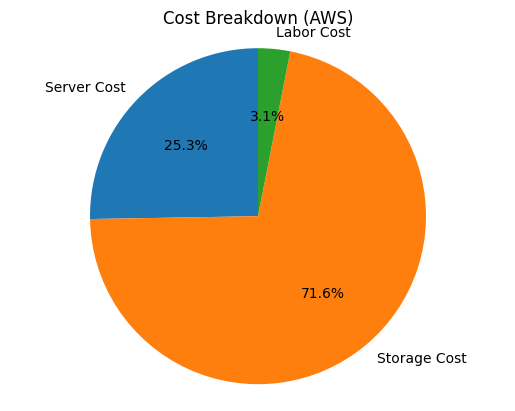

Estimated annual cost for Azure: 15007500.00
Detailed Cost Report for Azure:
  Cost Component  Amount (Azure)
0    Server Cost         59400.0
1   Storage Cost        139500.0
2     Labor Cost          1200.0


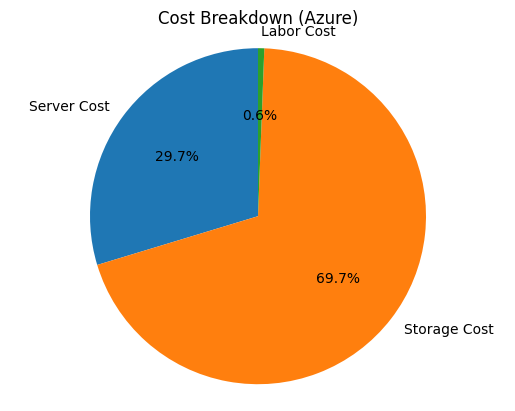

Estimated annual cost for GCP: 16780500.00
Detailed Cost Report for GCP:
  Cost Component  Amount (GCP)
0    Server Cost       84000.0
1   Storage Cost      139500.0
2     Labor Cost         240.0


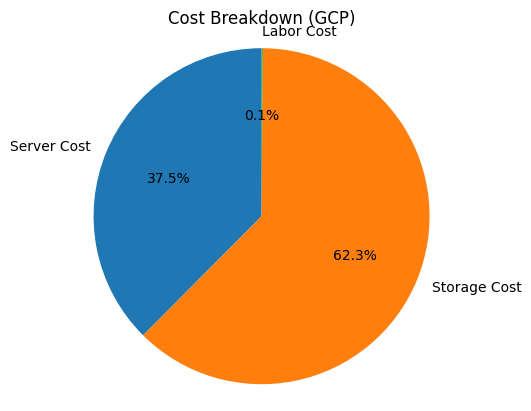

Estimated annual on-premises cost: 467550.00
Detailed Cost Report for On-Premises:
  Cost Component  Amount (On-Premises)
0    Server Cost               88800.0
1   Storage Cost              348750.0
2     Labor Cost               30000.0


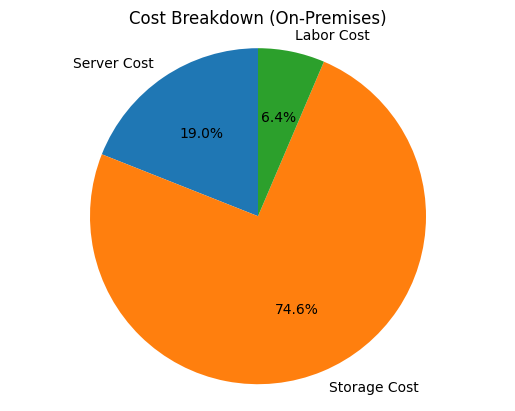

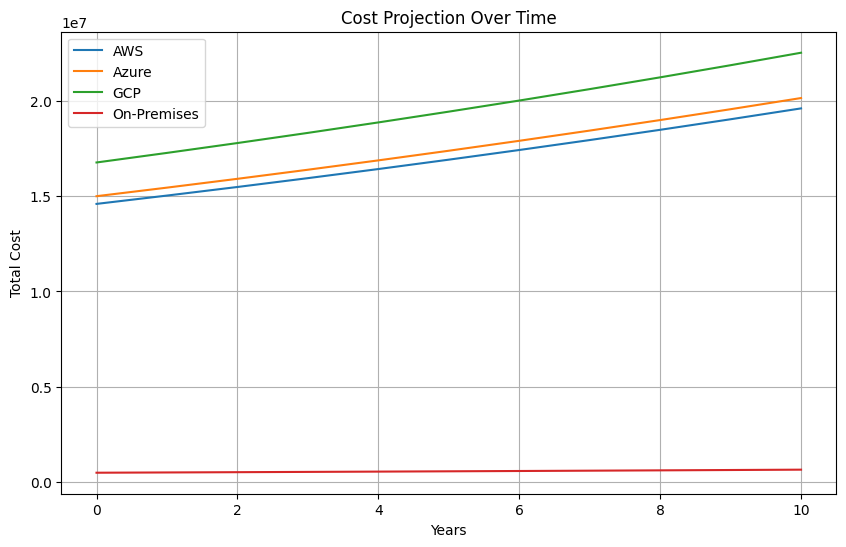

Predicted DeploymentCU: Medium


In [77]:
def run_tco_calculator():
    server_workload = collect_server_workload()
    storage_costs = collect_storage_costs()
    labor_costs = collect_labor_costs()
    country = input("Please enter your country: ")
    cloud_providers = ['AWS', 'Azure', 'GCP']
    cost_projections = {}
    on_premises_server_cost = estimate_server_cost(server_workload, is_cloud=False)
    on_premises_server_cost = display_costs_in_local_currency(country,on_premises_server_cost)
    on_premises_storage_cost = estimate_storage_cost(storage_costs, is_cloud=False)
    on_premises_storage_cost = display_costs_in_local_currency(country,on_premises_storage_cost)

    on_premise_labor_cost = estimate_labor_cost(labor_costs, server_workload,is_cloud=False)
    on_premise_labor_cost = display_costs_in_local_currency(country,on_premise_labor_cost)

    for provider in cloud_providers:
        cloud_server_cost = estimate_cloud_server_cost(server_workload, provider)
        cloud_server_cost = display_costs_in_local_currency(country,cloud_server_cost)
        cloud_storage_cost = estimate_storage_cost(storage_costs, is_cloud=True)
        cloud_storage_cost = display_costs_in_local_currency(country,cloud_storage_cost)
        cloud_labor_cost = estimate_labor_cost(labor_costs, server_workload, is_cloud=True)  # Assuming labor cost is same for both
        cloud_labor_cost = display_costs_in_local_currency(country,cloud_labor_cost)
        cloud_total = cloud_server_cost + cloud_storage_cost + cloud_labor_cost
        cloud_total = display_costs_in_local_currency(country,cloud_total)
        cost_projections[provider] = cloud_total
        cloud_details = {'Server Cost': cloud_server_cost, 'Storage Cost': cloud_storage_cost, 'Labor Cost': cloud_labor_cost}

        print(f"Estimated annual cost for {provider}: {cloud_total:.2f}")
        # generate_report(cloud_details, provider)

    on_premises_total = on_premises_server_cost + on_premises_storage_cost + on_premise_labor_cost
    on_premise_total = display_costs_in_local_currency(country,on_premises_total)
    cost_projections['On-Premises'] = on_premises_total
    on_premises_details = {'Server Cost': on_premises_server_cost, 'Storage Cost': on_premises_storage_cost, 'Labor Cost': on_premise_labor_cost}

    print(f"Estimated annual on-premises cost: {on_premises_total:.2f}")
    generate_report(on_premises_details, 'On-Premises')
    # project_costs_over_time(server_workload, storage_costs, labor_costs, cost_projections, 10)
    input_for_prediction = {
    'IOPS': [server_workload.iops],
    'Compute': [f"{server_workload.cores_per_server} vCPUs"],
    'NetworkReq': [f"{server_workload.network_gb} Gbps"],
    'BackupDedupeRatio': [server_workload.backup_dedupe_ratio],
    'Storage': [storage_costs.total_storage_gb],
    'RAM': [f"{server_workload.ram_gb} GB"],
    'Latency': [server_workload.latency],
    'WorkloadType': [server_workload.workload_type]
    }
    input_df = pd.DataFrame(input_for_prediction)
    predicted_deployment = predict_deployment_cu(input_df)
    print(f"Predicted DeploymentCU: {predicted_deployment}")


if __name__ == "__main__":
    run_tco_calculator()
